# Pie Plot

파이 차트는 한 변수에 대한 전체 대비 부문별 구성비를 보여주는 그래프

파이 차트는 명목형 또는 범주형 데이터에 사용된다.

변수에 다양한 수준이 있는 경우, 막대 차트를 이용한 빈도 그래프가 더 유용할 수 있다.

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 데이터 가져오기

어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터

In [2]:
origin = read_excel("https://data.hossam.kr/pydata/poll.xlsx")
origin

,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70
5,남자,기혼,21,대학원,80
6,여자,미혼,39,대학교,190
7,남자,기혼,32,대학교,100
8,남자,미혼,44,초등학교,120
9,남자,미혼,55,대학교,110


### [3] 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.unicode_minus"] = False

## #02. 남여 성비 시각화

### [1] 데이터 전처리

In [4]:
sexRatio = origin['성별'].value_counts()
sexRatio

성별
남자    27
여자    13
Name: count, dtype: int64

### [2] 표시할 데이터와 라벨 구분

반드시 리스트 타입으로 변환해야 하는 것은 아니다. 연속성을 갖는 모든 형태(리스트, 튜플, ndarray, 시리즈)가 모두 가능하다.

In [5]:
data = list(sexRatio.values)
labels = list(sexRatio.index)
print("데이터:", data)
print("라벨:", labels)

데이터: [27, 13]
라벨: ['남자', '여자']


### [3] 파이 그래프 구현

`autopct`는 각 조각에 표시될 비율의 출력 형식을 형식문자열로 설정한다.

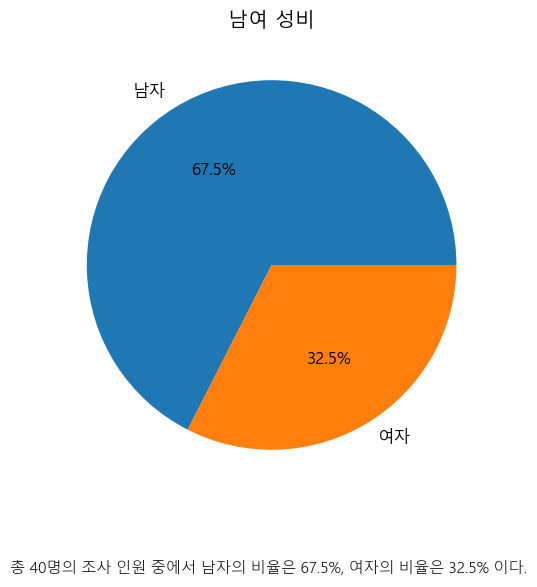

In [6]:
plt.figure()
plt.title("남여 성비")
plt.pie(data, labels=labels, autopct='%0.1f%%')

txt = "총 40명의 조사 인원 중에서 남자의 비율은 67.5%, 여자의 비율은 32.5% 이다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})

plt.show()
plt.close()

## #03. 최종 학력 비율 시각화

### [1] 데이터 전처리

In [7]:
eduRatio = origin['최종학력'].value_counts()
eduRatio

최종학력
대학교     19
대학원     16
고등학교     3
초등학교     1
중학교      1
Name: count, dtype: int64

### [2] 그래프 구현

| 파라미터 | 설명 |
|---|---|
| colors | 각 조각의 색상을 리스트로 지정 |
| explode | 각 조각이 원점으로부터 떨어져 있는 정도. `0~1` 사이의 값을 갖는다. |
| startangle | 그래프의 회전각 (기본값=`0`) |
| shadow | 그림자 효과 사용 (기본값=`False`) |

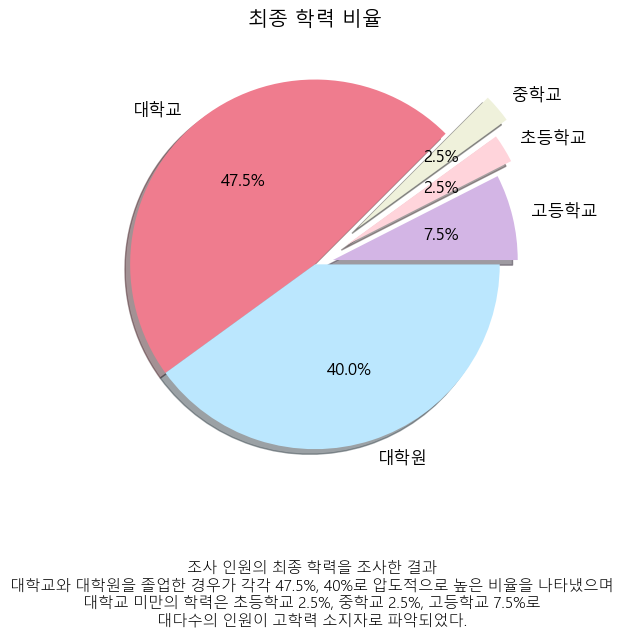

In [11]:
plt.figure()
plt.title("최종 학력 비율")
plt.pie(eduRatio.values, labels=eduRatio.index, autopct='%0.1f%%',
        colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#EFF1DB'],
        explode=[0, 0, 0.1, 0.2, 0.3],
        startangle=45,
        shadow=True) # 일반적으로 shadow를 설정하지 않는다.

txt = """조사 인원의 최종 학력을 조사한 결과
대학교와 대학원을 졸업한 경우가 각각 47.5%, 40%로 압도적으로 높은 비율을 나타냈으며
대학교 미만의 학력은 초등학교 2.5%, 중학교 2.5%, 고등학교 7.5%로
대다수의 인원이 고학력 소지자로 파악되었다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})

plt.show()
plt.close()